# Data Glacier Internship
# Week 9
# Pattern Pros
# Data Cleansing and Transformation
## Sarah Sindeband
## Imputation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean, std

In [ ]:
# read in data
df_bank_full = pd.read_csv('bank-full.csv', delimiter=";", na_values="unknown")
df_bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [ ]:
df_bank_full.isnull().sum()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

### Transforming the Education Column

In [ ]:
df_bank_full["education"].unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

Based on the education system in Portugal (because this data was collected in Portugal)
- Primary school: ages 6 to 15
- Secondary education: ages 15 to 18
- Tertiary education: (higher education) ages 18 and above

In [ ]:
df_bank_full["education"].value_counts()

secondary    23202
tertiary     13301
primary       6851
Name: education, dtype: int64

In [ ]:
new_df = df_bank_full.replace("primary", 1)

In [ ]:
new_df = new_df.replace("secondary", 2)

In [ ]:
new_df = new_df.replace("tertiary", 3)

In [ ]:
new_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3.0,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,2.0,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,2.0,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3.0,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,1.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,2.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,2.0,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


In [ ]:
ed_mean = new_df["education"].mean()
ed_med = new_df["education"].median()
ed_mode = new_df["education"].mode()

In [ ]:
print("Education mean:", format(ed_mean, ".4f"))
print("Education median:", format(ed_med, ".4f"))
print("Education mode:", ed_mode)

Education mean: 2.1488
Education median: 2.0000
Education mode: 0    2.0
dtype: float64


Text(0, 0.5, 'Count')

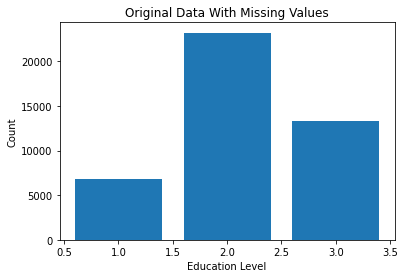

In [ ]:
ed = new_df.education.value_counts()
plt.bar(ed.index, ed.values)
plt.title("Original Data With Missing Values")
plt.xlabel("Education Level")
plt.ylabel("Count")


In [ ]:
# imputation
up_df = new_df
up_df["education"].fillna(2, inplace=True)
up_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3.0,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,2.0,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,2.0,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,2.0,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,2.0,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,3.0,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,divorced,1.0,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,married,2.0,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,2.0,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN,no


Text(0, 0.5, 'Count')

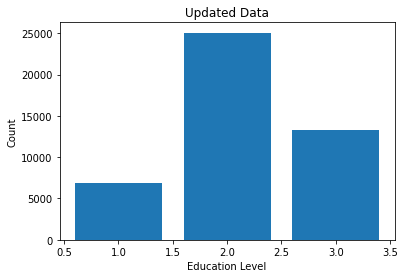

In [ ]:
up_ed = up_df.education.value_counts()
plt.bar(up_ed.index, up_ed.values)
plt.title("Updated Data")
plt.xlabel("Education Level")
plt.ylabel("Count")

In [ ]:
up_df["education"].isnull().sum()

0

In [ ]:
up_df["education"].value_counts()

2.0    25059
3.0    13301
1.0     6851
Name: education, dtype: int64

### Transforming the Job Column

In [ ]:
up_df["job"].unique()

NameError: ignored

In [ ]:
up_df["job"].value_counts()

In [ ]:
j_mode = up_df["job"].mode()
print("Job mode:", j_mode)

In [ ]:
jobs = up_df.job.value_counts()
plt.bar(jobs.index, jobs.values)
plt.title("Original Data With Missing Values")
plt.xlabel("Job Title")
plt.xticks(rotation=45)
plt.ylabel("Count")

In [ ]:
# imputation
up_df["job"].fillna("blue-collar", inplace=True)
up_df

In [ ]:
up_jobs = up_df.job.value_counts()
plt.bar(jobs.index, jobs.values)
plt.title("Updated Data")
plt.xlabel("Job Title")
plt.xticks(rotation=45)
plt.ylabel("Count")

In [ ]:
up_df["job"].isnull().sum()

In [ ]:
up_df["job"].value_counts()

In [ ]:
up_df.isnull().sum()

### Transforming the Contact Column

In [ ]:
up_df["contact"].unique()

NameError: ignored

In [ ]:
up_df["contact"].value_counts()

NameError: ignored

In [ ]:
up_df["contact"].isnull().sum()

In [ ]:
con_mode = up_df["contact"].mode()
print("Contact mode:", con_mode)

In [ ]:
cons = up_df.contact.value_counts()
plt.bar(cons.index, cons.values)
plt.title("Original Data With Missing Values")
plt.xlabel("Contact Method")
plt.ylabel("Count")

In [ ]:
# imputation
up_df["contact"].fillna("cellular", inplace=True)
up_df

In [ ]:
up_cons = up_df.contact.value_counts()
plt.bar(up_cons.index, up_cons.values)
plt.title("Updated Data")
plt.xlabel("Contact Method")
plt.ylabel("Count")

In [ ]:
up_df["contact"].isnull().sum()

In [ ]:
up_df["contact"].value_counts()

In [ ]:
up_df.isnull().sum()

In [ ]:
up_df.shape

## Checking for outliers
## Jay Panara

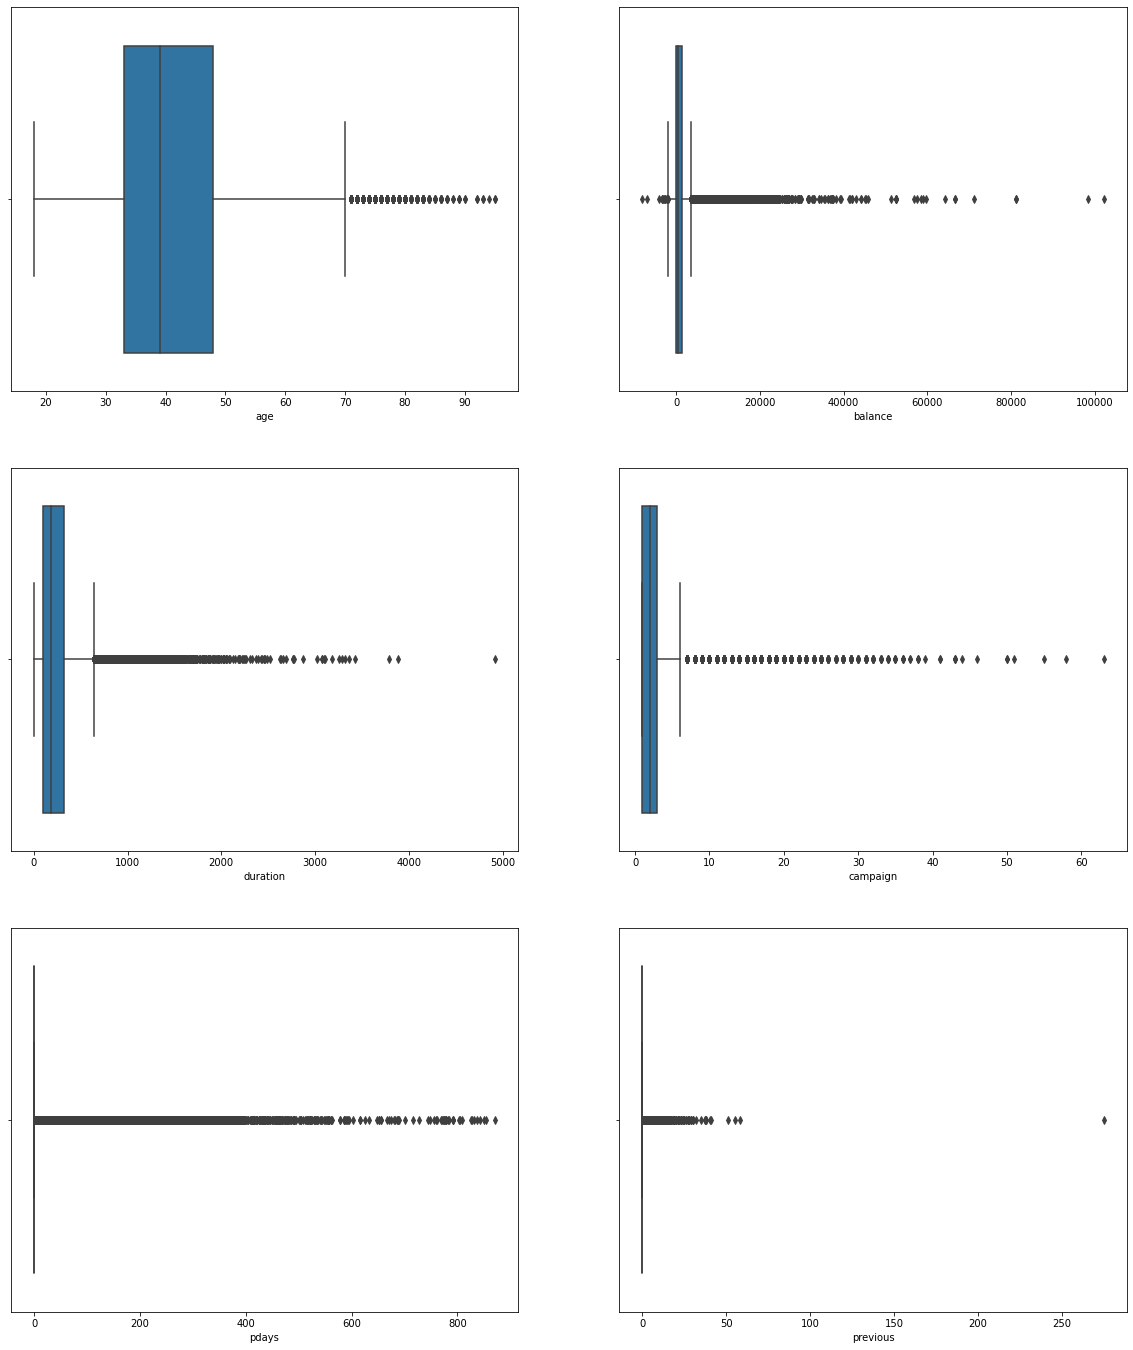

In [ ]:
#Boxplot for finding the outliers:
selected_columns = ["age","balance","duration","campaign","pdays","previous"]

plt.figure(figsize = (20,24))
j=1
for i in selected_columns:
  plt.subplot(3,2,j)
  sns.boxplot(x=up_df[i])
  j=j+1

In [ ]:

# identify outliers with interquartile range
from numpy.random import seed
from numpy.random import randn
from numpy import percentile
for i in selected_columns:
  q25, q75 = percentile(up_df[i], 25), percentile(up_df[i], 75)
  iqr = q75 - q25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower, upper = q25 - cut_off, q75 + cut_off
  # identify outliers
  outliers = [x for x in up_df[i] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  # remove outliers
  outliers_removed = [x for x in up_df[i] if x >= lower and x <= upper]
  print('Non-outlier observations: %d' % len(outliers_removed))

  up_df= up_df[(up_df[i] >= lower) & (up_df[i] <= upper)]

print(up_df)

Percentiles: 25th=33.000, 75th=48.000, IQR=15.000
Identified outliers: 487
Non-outlier observations: 44724
Percentiles: 25th=71.000, 75th=1408.000, IQR=1337.000
Identified outliers: 4696
Non-outlier observations: 40028
Percentiles: 25th=102.000, 75th=315.000, IQR=213.000
Identified outliers: 2878
Non-outlier observations: 37150
Percentiles: 25th=1.000, 75th=3.000, IQR=2.000
Identified outliers: 2587
Non-outlier observations: 34563
Percentiles: 25th=-1.000, 75th=-1.000, IQR=0.000
Identified outliers: 6494
Non-outlier observations: 28069
Percentiles: 25th=0.000, 75th=0.000, IQR=0.000
Identified outliers: 0
Non-outlier observations: 28069
       age           job  marital  education default  balance housing loan  \
0       58    management  married        3.0      no     2143     yes   no   
1       44    technician   single        2.0      no       29     yes   no   
2       33  entrepreneur  married        2.0      no        2     yes  yes   
3       47   blue-collar  married        2.0

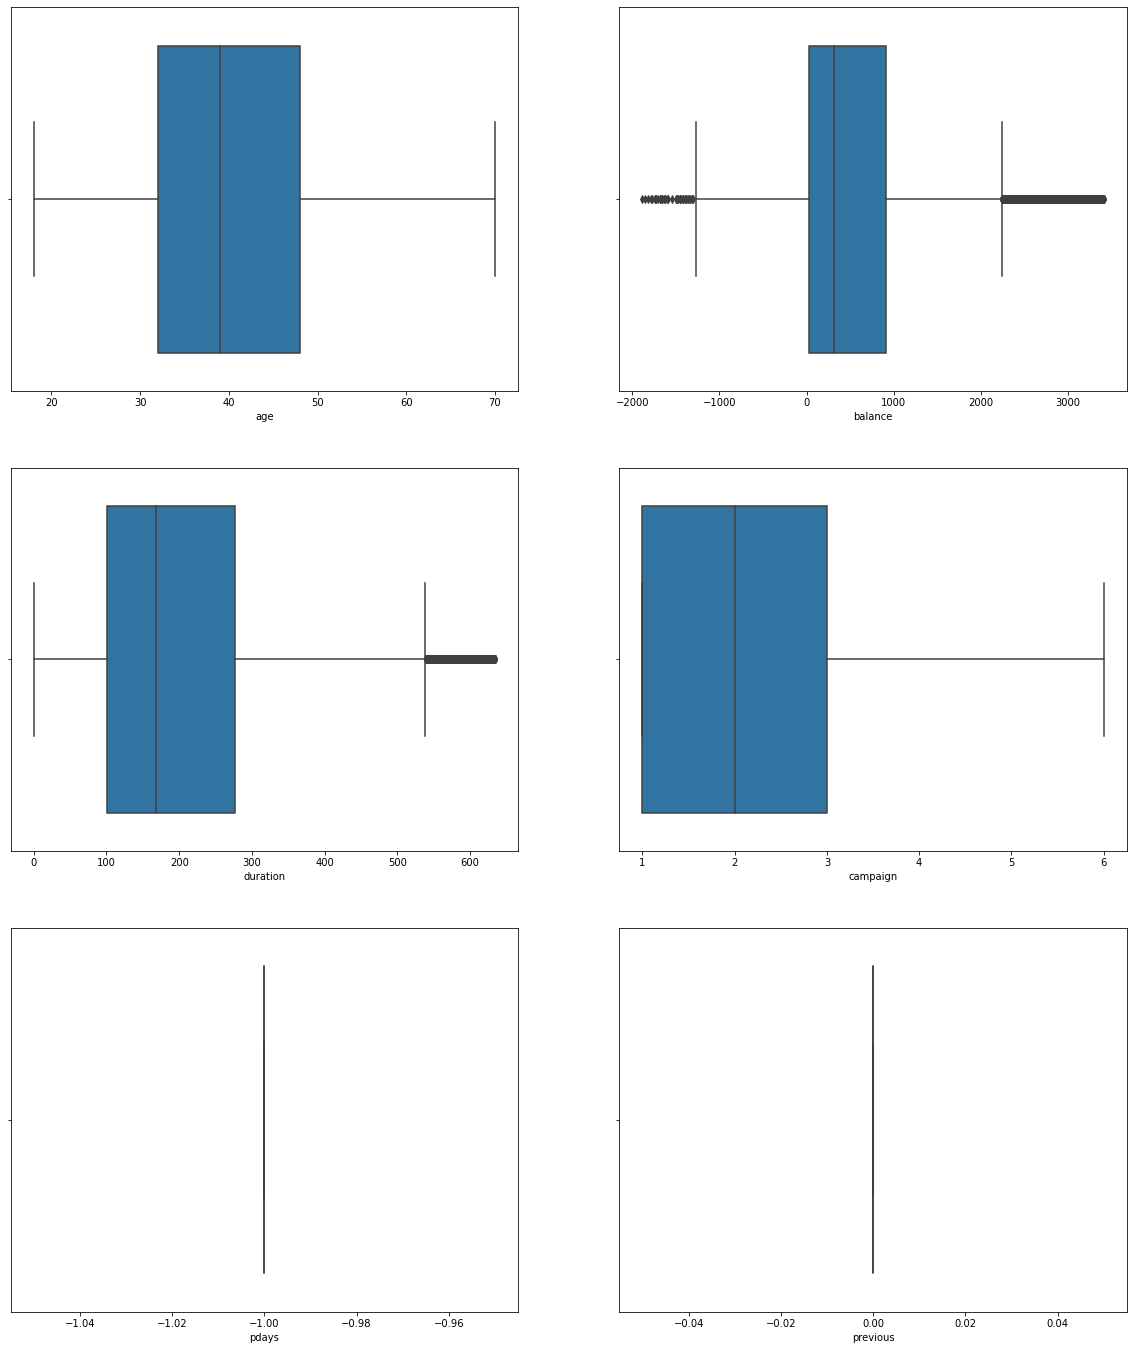

In [ ]:
#Boxplot for finding the outliers:
plt.figure(figsize = (20,24))
j=1
for i in selected_columns:
  plt.subplot(3,2,j)
  sns.boxplot(x=up_df[i])
  j=j+1